In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from celmech.andoyer import Andoyer, AndoyerHamiltonian
import numpy as np

def wrap(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return val

npwrap = np.vectorize(wrap)

class Clicker(object):
    def __init__(self, k, Phiprime, projection=None):
        self.ax = plt.subplot('111', projection=projection)
        self.k = k
        self.Phiprime = Phiprime
        self.projection = projection
        self.cid = self.ax.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        phi = event.xdata
        Phi = event.ydata
        if Phi < 0:
            return
        andvars = Andoyer(self.k+1, self.k,Phi,phi,Phiprime=self.Phiprime) # could choose any j
        H = AndoyerHamiltonian(andvars)
        tmax=100
        Nout = 1000
        times = np.linspace(0, tmax, Nout)
        Phi, phi = np.zeros(Nout), np.zeros(Nout)
        for i, time in enumerate(times):
            H.integrate(time)
            Phi[i] = H.state.Phi
            phi[i] = H.state.phi
        if self.projection is None:
            self.ax.plot(npwrap(phi), Phi, '.')
        else:
            self.ax.plot(phi, Phi, '.')
        #ax.set_rlim(0,20)

<IPython.core.display.Javascript object>


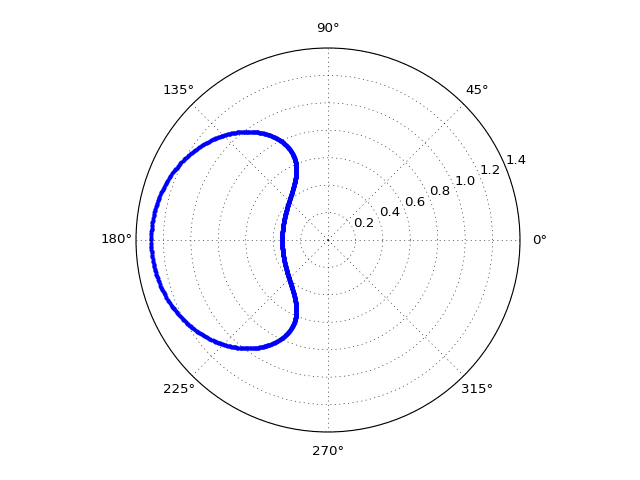

In [2]:
clicker = Clicker(2, 1.5, 'polar')

<IPython.core.display.Javascript object>


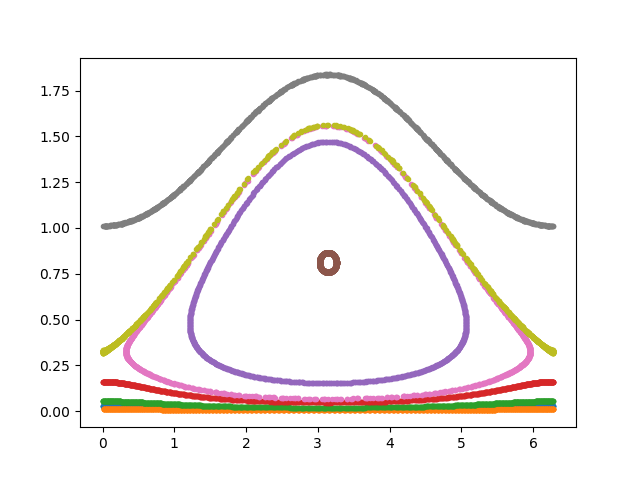

In [6]:
clicker = Clicker(2, 1.5)